# 1. Import library
Note: Combined from various sources, much more comprehensive than the original code provided. Import 也很讲究 XDXD

Also note: For this "Ab_Virus_01_Data_Preprocessing_v01.ipynb" Jupyter Notebook, you have to run it in the <b>"my-rdkit-env"<b> environment.

### 1.1 Import RDKit

In [1]:
from rdkit import Chem

RDKit WARNING: [03:02:42] Enabling RDKit 2019.09.3 jupyter extensions


### 1.2 Import OS and Path

In [2]:
import os
from pathlib import Path

### 1.3 Import data structures

In [3]:
import numpy as np
import pandas as pd
import multiprocessing
import logging

### 1.4 Import visualisation tools

In [4]:
import seaborn as sb
sb.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Import csv file as panda df

In [5]:
# df= pd.read_csv('2F5_4E10_10E8_final.csv') # dataset file here
df = pd.read_csv('VirusNet_additional.csv')

In [6]:
df.sample(30)

,Fasta_Ab,Fasta_Virus,Species,pdb,Comments,Unnamed: 5,Unnamed: 6,Unnamed: 7
228,QRSGGSLDLVYFDGSYGYADMSNIFDRWTGYDKSVAS,DKAIPRENRSN,HIV,6OKP,SF12,NaN,NaN,NaN
268,KAWYNEGPDHDYGVHLR,AVGIGAV,HIV,6MQM,NaN,NaN,NaN,NaN
2,YSGQVGYSSTYLSNNRTRWFY,KLDGIDCPHCDVFERSKAFNGSDAP,influenza,1eo8,NaN,NaN,NaN,NaN
129,TYKFFGSNSHYCLDCD,YTQNGTSSNSFWTHLNFFLI,influenza,4O5I,NaN,NaN,NaN,NaN
141,SEFNELKRSGRLMTYRRDRSTGLGEAPDYYNPYSSTPY,EWKNNVEHLTENTNNAKTTGGDEINMWQRVGQTRDGGDRDR,HIV,4RX4,NaN,NaN,NaN,NaN
84,RKRGYNYYDFYDGYY,CSFNTTKDRKQKVNADEG,hiv,3u2s,NaN,NaN,NaN,NaN
180,FDDPYTDDFTPHFARPIYSYRTRDSSLFDMYYEEGLSTGGTP,EWKNNEINTTNNAKNSGGDEVNMWQITDGGSTRGGGDMRHKSRAY,HIV,6UDK,1_55,NaN,NaN,NaN
303,QIHYGNGLRWSAVDTGSSPTYRWSGHHDSTGNWYRAALA,WSNRWLQDKENWKDTEEFNKGPNITFR,HIV,5VIY,8ANC195 G52K5 Fab light chain,NaN,NaN,NaN
389,VDSRPHSDIHNATTRARIYGVVALEWFHDTSRFRSSQRSSAWTDSK,TNNITDDPDIIGDIRQAHTLP,HIV 1,6DFG,NaN,NaN,NaN,NaN
272,DWNNAAVGYRDIQGFGNYAYNSA,FATHACVPTDPNPQILETPAGYVSVQI,HIV,6MFP,NaN,NaN,NaN,NaN


In [7]:
df['Species'].value_counts()

HIV                                                109
hiv                                                 57
HIV                                                 35
HIV 1                                               26
Influenza                                           26
influenza                                           21
dengue                                              15
Respiratory Syncytial Virus                         14
HEPATITIS                                           12
Ebola Virus                                          8
sars                                                 8
INFLUENZA                                            7
Zika virus                                           6
Rift Valley fever virus                              5
influenza                                            4
DENGUE                                               4
ebola                                                4
Hepatitis C                                          3
west nile 

# 3. Convert FASTA to Molecular and Atomic representation, and finally to one-hot vector
One-hot vector in dimension of 1933 molecules X 179 atoms X 37 atomic features

In [8]:
for i in range(len(df['Fasta_Virus'])):
    try:
        mol = Chem.MolFromFASTA(df['Fasta_Virus'].loc[i])
        atoms = mol.GetAtoms()
    except:
        print("Data index " + str(i) + " has error.")
        
mol_virus = []
for i in range(112):
    mol = Chem.MolFromFASTA(df['Fasta_Virus'].loc[i])
    mol_virus.append(mol)
for i in range(113, 264):
    mol = Chem.MolFromFASTA(df['Fasta_Virus'].loc[i])
    mol_virus.append(mol)
for i in range(265, len(df['Fasta_Virus'])):
    mol = Chem.MolFromFASTA(df['Fasta_Virus'].loc[i])
    mol_virus.append(mol)
print(len(mol_virus))

Data index 264 has error.
414


In [9]:
for i in range(len(df['Fasta_Ab'])):
    try:
        mol = Chem.MolFromFASTA(df['Fasta_Ab'].loc[i])
        atoms = mol.GetAtoms()
    except:
        print("Data index " + str(i) + " has error.")

mol_ab = []
for i in range(112):
    mol = Chem.MolFromFASTA(df['Fasta_Ab'].loc[i])
    mol_ab.append(mol)
for i in range(113, 264):
    mol = Chem.MolFromFASTA(df['Fasta_Ab'].loc[i])
    mol_ab.append(mol)
for i in range(265,len(df['Fasta_Ab'])):
    mol = Chem.MolFromFASTA(df['Fasta_Ab'].loc[i])
    mol_ab.append(mol)
print(len(mol_ab))

Data index 112 has error.
414


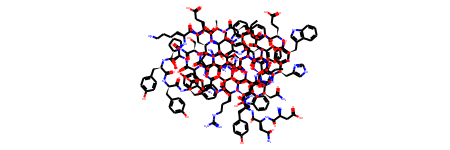

In [10]:
# Visualise a molecule:

mol = mol_ab[0]
mol

In [11]:
atoms = mol.GetAtoms()
print(len(atoms))

370


In [12]:
# Individual atom:

atom = atoms[0]
print(atom.GetSymbol(), atom.GetDegree(), atom.GetImplicitValence(), atom.GetFormalCharge(), atom.GetNumRadicalElectrons())
print(atom.GetHybridization(), atom.GetIsAromatic())
print(atom.GetTotalNumHs())

try:
    print("Chirality possible, ", atom.GetProp('_CIPCode'), atom.HasProp('_ChiralityPossible'))
except:
    print("Chirality not possible, ", atom.HasProp('_ChiralityPossible'))


N 1 2 0 0
SP3 False
2
Chirality not possible,  0


In [13]:
def mol2vec(mol): # creates features
    atoms = mol.GetAtoms()
    node_f= [atom_features(atom) for atom in atoms] # There are 179 atoms?
    return node_f

def atom_features(atom,explicit_H=False,use_chirality=False):
  # from rdkit import Chem
  
  # Convert atom.GetSynbol() into a one-hot vector (6 columns)
  # if atom.GetSymbol()=='C',       it will return [1, 0, 0, 0, 0, 0]
  # if atom.GetSymbol()=='unknown', it will return [0, 0, 0, 0, 0, 1]
  results = one_of_k_encoding_unk(atom.GetSymbol(),
    [
      'C',
      'N',
      'O',
      'S',
      'H',  # H?
      'Unknown'
    ])
  
  # Convert atom.GetDegree() into one-hot vector (11 columns)
  results += one_of_k_encoding(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
  
  # Convert atom.GetImplicitValence() into one-hot vector (7 columns)
  results += one_of_k_encoding_unk(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6])
  
  # Two columns for atom.GetFormalCharge() and atom.GetNumRadicalElectrons() (2 columns)
  results += [atom.GetFormalCharge(), atom.GetNumRadicalElectrons()]
    
  # Convert atom.GetHybridization() into one-hot vector (5 columns)
  results += one_of_k_encoding_unk(atom.GetHybridization(), \
    [Chem.rdchem.HybridizationType.SP, Chem.rdchem.HybridizationType.SP2,Chem.rdchem.HybridizationType.SP3, \
     Chem.rdchem.HybridizationType.SP3D, Chem.rdchem.HybridizationType.SP3D2])
       
  # One column for atom.GetIsAromatic() (1 column)
  results += [atom.GetIsAromatic()]
  
  # Note: default activated
  # In case of explicit hydrogen(QM8, QM9), avoid calling `GetTotalNumHs`
  # Convert atom.GetTotalNumHs() into one-hot vector (5 columns)
  if not explicit_H:  # Default activated
    results += one_of_k_encoding_unk(atom.GetTotalNumHs(), [0, 1, 2, 3, 4]) # 5 columns
  
  # Note: default not activated
  # Convert atom.GetProp('_CIPCode') and atom.HasProp('_ChiralityPossible') into one-hot vector (3 columns)
  if use_chirality: # Default not activated
    try:
      results += one_of_k_encoding_unk(atom.GetProp('_CIPCode'),['R', 'S']) + [atom.HasProp('_ChiralityPossible')] # 3 columns
    except:
      results += [False, False] + [atom.HasProp('_ChiralityPossible')] # 3 columns

  return np.array(results) 


# Convert to a one-hot vector [0, 0, ..., 0, 1, 0, ..., 0, 0]
# where 0 denotes it is not true for a feature, 1 denotes it is true for a feature

def one_of_k_encoding_unk(x, allowable_set): # Unknown is allowed
  """Maps inputs not in the allowable set to the last element."""
  if x not in allowable_set:
    x = allowable_set[-1]
  return list(map(lambda s: x == s, allowable_set))

def one_of_k_encoding(x, allowable_set): # Unknown is not allowed
  if x not in allowable_set:
    raise Exception("input {0} not in allowable set{1}:".format(
        x, allowable_set))
  return list(map(lambda s: x == s, allowable_set))

In [14]:
ab_feature = []
for i in range (len(mol_ab)):
    ab = mol2vec(mol_ab[i])
    # print(ab)
    for i in range(len(ab)):
    	if ((ab[i][29]==1)): # if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3D
    		print(i)
    ab = np.asarray(ab)
    ab_feature.append(ab)
ab_feature = np.asarray(ab_feature)

<ipython-input-14-4f6beb5e560d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ab_feature = np.asarray(ab_feature)


Notice that shape is not consistent across all molecules due to the varying number of atoms for each molecule, but the dimension of the one-hot vector is consistent, since it is defined by the atom_features function above.

In [16]:
print(ab_feature.shape[0])
print(ab_feature[0].shape)
print(ab_feature[413].shape)

414
(370, 37)
(239, 37)


In [17]:
print(ab_feature)

[array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         ...,
                                         [0, 0, 1, ..., 0, 0, 0],
                                         [0, 0, 1, ..., 0, 0, 0],
                                         [0, 0, 1, ..., 0, 0, 0]])
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
   

Notice that shape is not consistent across all molecules due to the varying number of atoms for each molecule, but the dimension of the one-hot vector is consistent, since it is defined by the atom_features function above.

In [18]:
virus_feature = []
for i in range (len(mol_virus)):
    ab = mol2vec(mol_virus[i])
    for i in range(len(ab)):
    	if ((ab[i][29]==1)):
    		print(i)
    ab = np.asarray(ab)
    virus_feature.append(ab)
virus_feature = np.asarray(virus_feature)

<ipython-input-18-b1d6dac4b4ba>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  virus_feature = np.asarray(virus_feature)


In [19]:
print(virus_feature.shape[0])
print(virus_feature[0].shape)
print(virus_feature[413].shape)

414
(296, 37)
(214, 37)


In [20]:
print(virus_feature)

[array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         ...,
                                         [0, 0, 1, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 1, 0],
                                         [0, 0, 1, ..., 0, 0, 0]])
 array([[0, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]]) array([[0, 1, 0, ..., 1, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
                                         [1, 0, 0, ..., 0, 0, 0],
   

# 4. Represent molecules in adjacency matrix and distance matrix

### 4.1 Adjacency matrix
Note that the dimension of the molecule's adjacency matrix is not the same for all molecules. But it must be a square matrix.

In [21]:
adj_matrix = Chem.rdmolops.GetAdjacencyMatrix(mol_ab[0]) # Returns the molecule’s adjacency matrix.
print(adj_matrix.shape)
adj_matrix

(370, 370)


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [23]:
adj_matrix = Chem.rdmolops.GetAdjacencyMatrix(mol_ab[413]) # Returns the molecule’s adjacency matrix.
print(adj_matrix.shape)
adj_matrix

(239, 239)


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

### 4.2 Distance matrix

In [24]:
distance_matrix = Chem.rdmolops.GetDistanceMatrix(mol_ab[0]) # Returns the molecule’s topological distance matrix.
print(distance_matrix.shape)
distance_matrix

(370, 370)


array([[  0.,   1.,   2., ..., 125., 126., 123.],
       [  1.,   0.,   1., ..., 124., 125., 122.],
       [  2.,   1.,   0., ..., 123., 124., 121.],
       ...,
       [125., 124., 123., ...,   0.,   1.,   6.],
       [126., 125., 124., ...,   1.,   0.,   7.],
       [123., 122., 121., ...,   6.,   7.,   0.]])

### 4.3 3-D distance matrix
Looks like RDKit library doesn't allow this operation...

In [25]:
distance_matrix_3D = Chem.rdmolops.Get3DDistanceMatrix(mol_ab[0]) # Returns the molecule’s 3D distance matrix.
print(distance_matrix_3D.shape)
distance_matrix_3D

ValueError: Bad Conformer Id

### 4.4 Generate the adjacency matrix
Note that np.eye means an idendity matrix I

In [26]:
ab_adj = []
for i in range(len(mol_ab)):
    p1 = [Chem.rdmolops.GetAdjacencyMatrix(mol_ab[i])+np.eye(Chem.rdmolops.GetAdjacencyMatrix(mol_ab[i]).shape[0])] # Adjacency matrix + I
    p1 = np.asarray(p1)
    p1 = p1.reshape(p1.shape[1], p1.shape[2])
    ab_adj.append(p1)
ab_adj = np.asarray(ab_adj)

<ipython-input-26-47a4760b3636>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ab_adj = np.asarray(ab_adj)


In [28]:
print(ab_adj.shape)
print(ab_adj[0].shape)
print(ab_adj[413].shape)

(414,)
(370, 370)
(239, 239)


In [29]:
virus_adj = []
for i in range(len(mol_virus)):
    p2 = [Chem.rdmolops.GetAdjacencyMatrix(mol_virus[i])+np.eye(Chem.rdmolops.GetAdjacencyMatrix(mol_virus[i]).shape[0])] # Adjacency matrix + I
    p2 = np.asarray(p2)
    p2 = p2.reshape(p2.shape[1], p2.shape[2])
    virus_adj.append(p2)
virus_adj = np.asarray(virus_adj)

<ipython-input-29-e86f58bb27e4>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  virus_adj = np.asarray(virus_adj)


In [30]:
print(virus_adj.shape)
print(virus_adj[0].shape)
print(virus_adj[413].shape)

(414,)
(296, 296)
(214, 214)


# 5. Matrix multiplication
For each molecule: [ adjacency matrix ] X [ feature matrix ]

In [31]:
matmul_ab = []
for i in range (ab_adj.shape[0]):
    matmul_temp = np.matmul(ab_adj[i],ab_feature[i]) # adjacency x feature
    matmul_ab.append(matmul_temp)
matmul_ab = np.asarray(matmul_ab)

<ipython-input-31-2f3dbe5ad8b9>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matmul_ab = np.asarray(matmul_ab)


In [32]:
print(matmul_ab.shape)
print(matmul_ab[0].shape)
print(matmul_ab[413].shape)

(414,)
(370, 37)
(239, 37)


In [33]:
matmul_virus = []
for i in range (virus_adj.shape[0]):
    matmul_temp = np.matmul(virus_adj[i],virus_feature[i]) # adjacency x feature
    matmul_virus.append(matmul_temp)
matmul_virus = np.asarray(matmul_virus)

<ipython-input-33-eaacb4fb0fce>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matmul_virus = np.asarray(matmul_virus)


In [34]:
print(matmul_virus.shape)
print(matmul_virus[0].shape)
print(matmul_virus[413].shape)

(414,)
(296, 37)
(214, 37)


# 6. Mean pooling

### 6.1 Mean over all atoms of a particular molecule
It is a mean over all atoms of a particular molecule

In [35]:
mean_test = np.mean(matmul_ab[0], axis=0)
print(mean_test.shape)
print(mean_test)

(37,)
[2.27027027 0.45945946 0.36216216 0.         0.         0.
 0.         0.49189189 1.24864865 1.35135135 0.         0.
 0.         0.         0.         0.         0.         1.2027027
 1.31891892 0.50540541 0.06486486 0.         0.         0.
 0.         0.         0.         2.05675676 1.03513514 0.
 0.         0.75675676 1.16216216 1.35945946 0.50540541 0.06486486
 0.        ]


### 6.2 Apply mean pooling to antibody and virus
For each molecule, 1) pool a mean over all atoms of a particular molecule; 2) retain the 37 feature points one-hot vector embedding layer

In [36]:
mean_ab = []
for i in range (matmul_ab.shape[0]):
    mean1 = np.mean(matmul_ab[i],axis=0).reshape(37) # pooling
    mean_ab.append(mean1)
mean_ab = np.asarray(mean_ab)

In [37]:
print(mean_ab.shape)

(414, 37)


In [38]:
mean_virus = []
for i in range (matmul_virus.shape[0]):
    mean2 = np.mean(matmul_virus[i],axis=0).reshape(37) # pooling
    mean_virus.append(mean2)
mean_virus = np.asarray(mean_virus)

In [39]:
print(mean_virus.shape)

(414, 37)


# 7 Element-wise sum for mean_ab and mean_virus matrices
Finally, we perform an element-wise sum for the antibody (1933 X 37) matrix and the virus (1933 X 37) matrix. 

### 7.1 Element-wise sum

In [40]:
mean_final_elementwise_sum = mean_ab + mean_virus
print(mean_final_elementwise_sum.shape)

(414, 37)


### 7.2 Saving as npy file

### 7.2.1 Defining X matrix

In [42]:
X = mean_final_elementwise_sum

### 7.2.2 Finding path

In [43]:
CURRENT_PATH = os.getcwd()
print(CURRENT_PATH)

/Users/Joshua/Dropbox/NTU_studies/2021_22_Year_2/URECA/Reading/PotentialAB


### 7.2.3 Defining name

In [47]:
X_file_name = os.path.join(CURRENT_PATH, "mean_final_additional_elementwise_sum.npy")
print(X_file_name)

/Users/Joshua/Dropbox/NTU_studies/2021_22_Year_2/URECA/Reading/PotentialAB/mean_final_additional_elementwise_sum.npy


### 7.3 Saving as npy file

In [48]:
np.save(X_file_name, X)
print("mean_final_additional_elementwise_sum.np' into directory.")

mean_final_additional_elementwise_sum.np' into directory.


### 7.4 Loading back

In [49]:
X = np.load(os.path.join(os.getcwd(), "mean_final_additional_elementwise_sum.npy"))
print("Loaded file 'mean_final_additional_elementwise_sum.npy'")

Loaded file 'mean_final_additional_elementwise_sum.npy'


### 7.5 Test loading back

In [50]:
print(X.shape)

(414, 37)


In [51]:
print(X)

[[4.39189189 0.99662162 0.74054054 ... 1.06621622 0.2        0.        ]
 [4.1957485  0.95311377 0.90706587 ... 0.76508982 0.23988024 0.        ]
 [4.32481203 0.96703297 0.7951417  ... 1.0503181  0.15014459 0.        ]
 ...
 [4.34750958 0.88850575 0.86091954 ... 0.8651341  0.20498084 0.        ]
 [4.45931284 0.92999225 0.75277706 ... 1.46680444 0.         0.        ]
 [4.367321   0.90515387 0.811911   ... 0.93416885 0.20963516 0.        ]]


# 8. Improvement 1: Antibody and virus matrices concatenation
Previously, we perform an element-wise sum for the antibody (1933 X 37) matrix and the virus (1933 X 37) matrix. 

Now, instead of summing the two matrices, we are going to concatenate the two matrices, along axis 1 (columns). This will create a (1933 X 74) resultant matrix.

### 8.1 Apply mean pooling to antibody and virus
For each molecule, 1) pool a mean over all atoms of a particular molecule; 2) retain the 37 feature points one-hot vector embedding layer

In [52]:
mean_ab = []
for i in range (matmul_ab.shape[0]):
    mean1 = np.mean(matmul_ab[i],axis=0).reshape(37) # pooling
    mean_ab.append(mean1)
mean_ab = np.asarray(mean_ab)
print(mean_ab.shape)

mean_virus = []
for i in range (matmul_virus.shape[0]):
    mean2 = np.mean(matmul_virus[i],axis=0).reshape(37) # pooling
    mean_virus.append(mean2)
mean_virus = np.asarray(mean_virus)
print(mean_virus.shape)

(414, 37)
(414, 37)


### 8.2 Concatenating mean_ab and mean_virus matrices
We concatenate the antibody (1933 X 37) matrix and the virus (1933 X 37) matrix, along axis 1 (columns). 

In [53]:
mean_final_concatenate = np.concatenate((mean_ab, mean_virus), axis = 1)
print(mean_final_concatenate.shape)

(414, 74)


### 8.3 Saving as npy files and test loading back

In [54]:
# Classifying X and Y
X = mean_final_concatenate

CURRENT_PATH = os.getcwd()
print(CURRENT_PATH)

X_file_name = os.path.join(CURRENT_PATH, "mean_final_additional_concatenate.npy")
print(X_file_name)

np.save(X_file_name, X)
print("Save file 'mean_final_additional_concatenate.npy' into directory.")

X = np.load(os.path.join(os.getcwd(), "mean_final_concatenate.npy"))
print("Loaded file 'mean_final_additional_concatenate.npy'")

print(X.shape)

/Users/Joshua/Dropbox/NTU_studies/2021_22_Year_2/URECA/Reading/PotentialAB
/Users/Joshua/Dropbox/NTU_studies/2021_22_Year_2/URECA/Reading/PotentialAB/mean_final_additional_concatenate.npy
Save file 'mean_final_additional_concatenate.npy' into directory.
Loaded file 'mean_final_additional_concatenate.npy'
(1933, 74)


In [55]:
print(X)

[[2.24022346 0.48044693 0.3575419  ... 0.52830189 0.11320755 0.        ]
 [2.24022346 0.48044693 0.3575419  ... 0.54901961 0.11764706 0.        ]
 [2.24022346 0.48044693 0.3575419  ... 0.54901961 0.11764706 0.        ]
 ...
 [2.38255034 0.4295302  0.29530201 ... 0.51818182 0.12727273 0.        ]
 [2.28688525 0.36885246 0.42622951 ... 0.81730769 0.05769231 0.        ]
 [2.23574144 0.43346008 0.40304183 ... 0.56470588 0.10196078 0.        ]]
